***Q1)*** How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Total number of multiplications=nmk<br>
Total number of additions= (k-1)nm<br><br>
Explanation:<br>
Multiplication of (n,k) and (k,m) matrix will result in (n,m) size matrix. Each entry of resultant matrix will be formed by adding k terms which requires (k-1) addition. Also the k terms that are been added are multiplied which means we require k multiplications.<br>
So for one entry in reultant matrix we require (k-1)addition and k multiplication. Therefore for n.m such entries in (n,m) sized resultant matrix, we would require (k-1)nm addition and nmk multiplications in total.

**Q2)** Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [2]:
# Defining matrices using a list of lists
matrix_a = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

matrix_b = [
    [9, 8, 7],
    [6, 5, 4],
    [3, 2, 1]
]

# Multiply matrices without library
def matrix_multiply(mat1 , mat2):       # (mat1 x mat2)
    if(len(mat1[0])!=len(mat2)):
        print("The matrix can't be multiplied")
        return 0
    #Considering mat1=(nxk) and mat2=(kxm)
    n=len(mat1)
    k=len(mat1[0])
    m=len(mat2)
    result=[]
    
    #Initialising result or final matrix
    for i in range(n):
        result+=[[]]
        for _ in range(m):
            result[i]+=[0]
    for i in range(n):
        for j in range(m):
            for l in range(k):
                result[i][j]+= (mat1[i][l]*mat2[l][j])
    
    return result    

print(matrix_multiply(matrix_a,matrix_b))
        

[[30, 24, 18], [84, 69, 54], [138, 114, 90]]


In [3]:
#Matrix Maltiplication using numpy
import numpy as np

result_np= np.dot(matrix_a, matrix_b)
print(result_np)

[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]


In [20]:
# Importing library to compare the timing
import time

start_time=time.time()
for _ in range(1000):
    matrix_multiply(matrix_a, matrix_b)
time_lst=time.time()-start_time

start_time=time.time()
for _ in range(1000):
    np.dot(matrix_a, matrix_b)
time_numpy=time.time()-start_time
print("List of list time = ",time_lst)
print("Numpy time = ",time_numpy)


List of list time =  0.04821419715881348
Numpy time =  0.03228116035461426


For small input size the list of list method is performing better but for large input size the numpy .dot product is working faster

***Q3)*** Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?



***Approach 1***<br>
Using the given method we would require to find (n/2)th highest element considering n to be the length of the list. Since median is the middle value in the sorted version the given list we could also say it as (n/2)th hightest element of the list. 
Now since we have to find (n/2)th highest element we will require n/2 passes i.e. n/2 iterations of the whole array. Hence the time complexity of this approach will be O($n^2$).<br>
We will also have an array which will keep the track of max elements so that we can handle the cases having duplicate elements.<br>
***Approach 2*** (Better)<br>
We could first sort the array which would be O(nlogn) and then return the middle element of the sorted array. The overall time complexity will be O(nlogn) which is better than O($n^2$).


In [5]:
def median_max(lst):
    n=len(lst)
    max_elements=[0]*n
    current_max=np.inf
    median=0
    for j in range(int(n/2)+1):
        no_candidate=1
        max=0
        idx=0
        for i in range(n):
            if(no_candidate and (not max_elements[i])):
                max=lst[i]
                idx=i
                no_candidate=0
            else:
                if((not max_elements[i]) and (max<lst[i])):
                    max=lst[i]
                    idx=i 
        
        if(((n%2)==0) and (j==int(n/2))):
            current_max=(current_max+max)/2
        else:
            current_max=max
        max_elements[idx]=1
    return current_max

print(median_max([1,2,8,4,5,6,7]))


5


In [6]:
# APPROACH 2
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        # Merge the sorted halves
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        # Check for any remaining elements in both halves
        
        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1
                
def median_sorting_array(lst):
    merge_sort(lst)
    n=len(lst)
    if((n%2)==1):
        return lst[n//2]
    else:
        return (lst[n//2-1] + lst[n//2])/2
print(median_sorting_array([1,2,8,4,5,6,7]))

5


In [7]:
import time
import random

arr=[random.randint(1,100) for _ in range(200)]
#Comparing methods
result_max=median_max(arr)
time_using_max=timeit.timeit(lambda:median_max(arr), number=100 )


result_sort= median_sorting_array(arr)
time_using_sorting=timeit.timeit(lambda:median_sorting_array(arr), number=100 )

result_numpy=np.median(arr)
time_using_numpy=timeit.timeit(lambda:np.median(arr), number=100 )

print(f"Result using max method: {result_max}")
print(f"Time using max method: {time_using_max:.6f} seconds")

print(f"\nResult using sorting method: {result_sort}")
print(f"Time using sorting method: {time_using_sorting:.6f} seconds")

print(f"\nResult using NumPy median: {result_numpy}")
print(f"Time using NumPy median: {time_using_numpy:.6f} seconds")

Result using max method: 56.0
Time using max method: 0.086824 seconds

Result using sorting method: 56.0
Time using sorting method: 0.022106 seconds

Result using NumPy median: 56.0
Time using NumPy median: 0.003843 seconds


***Q4)*** What is the gradient of the following function with respect to x and y?<br> $x^2 y + y^3 sin(x)$<br>
***Sol:***<br>$f= x^2y + y^3sin(x)$<br>
 1. Partial derivative with respect to x:<br>
$ \frac{\partial f }{\partial x}= 2xy + y^3cos(x)$
 2. Partial derivative with respect to y:<br>
$\frac{\partial f }{\partial x}= x^2 + 3y^2sin(x)$<br>
Therefore, the gradient of the given function with respect to x and y is <br>
$(2xy + y^3cos(x),x^2 + 3y^2sin(x))$

***Q5)*** Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [8]:
# %pip install jax jaxlib
import jax
import jax.numpy as jnp

def f(x,y):
    return (x**2)*y + (y**3)*jnp.sin(x)


grad_x_f = jax.grad(f,argnums=0)
grad_y_f = jax.grad(f,argnums=1)
x_value = 3.0
y_value = 5.0
f_x = grad_x_f(x_value,y_value)
f_y = grad_y_f(x_value,y_value)

print("\nJAX method solution")
print(f'Function derivative w.r.t X has a value at X = {x_value} and Y = {y_value} is: {f_x:.4f}')
print(f'Function derivative w.r.t Y has a value at X = {x_value} and Y = {y_value} is: {f_y:.4f}')

# Analytic Solution
def df_dx_analytic(x,y):
    return 2*x*y + y**3*np.cos(x)

def df_dy_analytic(x,y):
    return x**2 +3*y**2*np.sin(x)

f_x_analytic= df_dx_analytic(x_value,y_value)
f_y_analytic= df_dy_analytic(x_value,y_value)
print("\nAnalytic Solution")
print(f'Function derivative w.r.t X has a value at X = {x_value} and Y = {y_value} is: {f_x_analytic:.4f}')
print(f'Function derivative w.r.t Y has a value at X = {x_value} and Y = {y_value} is: {f_y_analytic:.4f}')


JAX method solution
Function derivative w.r.t X has a value at X = 3.0 and Y = 5.0 is: -93.7491
Function derivative w.r.t Y has a value at X = 3.0 and Y = 5.0 is: 19.5840

Analytic Solution
Function derivative w.r.t X has a value at X = 3.0 and Y = 5.0 is: -93.7491
Function derivative w.r.t Y has a value at X = 3.0 and Y = 5.0 is: 19.5840


***Q6)*** Use sympy to confirm that you obtain the same gradient analytically.

In [9]:
# %pip install sympy
from sympy import symbols, sin, diff
x,y = symbols('x y')
f = (x**2)*y + sin(x)*(y**3)
df_dx = diff(f,x)
df_dy = diff(f,y)
print(f'Gradient wrt. x using sympy is {df_dx}')
print(f'Gradient wrt. y using sympy is {df_dy}')
x_value = 3.0
y_value = 5.0
df_dx_value = df_dx.subs({x: x_value, y: y_value})
df_dy_value = df_dy.subs({x: x_value, y: y_value})
print(f"The derivative with respect to x at x = {x_value} and y = {y_value} is: {df_dx_value.evalf():.4f}")
print(f"The derivative with respect to x at x = {x_value} and y = {y_value} is: {df_dy_value.evalf():.4f}")

Gradient wrt. x using sympy is 2*x*y + y**3*cos(x)
Gradient wrt. y using sympy is x**2 + 3*y**2*sin(x)
The derivative with respect to x at x = 3.0 and y = 5.0 is: -93.7491
The derivative with respect to x at x = 3.0 and y = 5.0 is: 19.5840


***Q7)*** Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [10]:
dict={
    2022: {
        'Branch 1': {
            1: {
                'Name': 'N',
                'Marks': { 'Maths':100 , 'English':70}
            }
        },
        'Branch 2': {
            
        }
    },
    
    2023:{
        'Branch 1': {},
        'Branch 2': {}
    },
    2024:{
        'Branch 1': {},
        'Branch 2': {}
    },
    2025:{
        'Branch 1': {},
        'Branch 2': {}
    }
}

print(dict)

{2022: {'Branch 1': {1: {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}}, 'Branch 2': {}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


***Q8)*** Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [11]:
class student_info:
    def __init__(self, roll_number, name, marks):
        self.roll_number=roll_number
        self.name= name
        self.marks= marks
        
class Branch:
    def __init__(self, branch_number):
        self.branch_number= branch_number
        self.student_info= []
    
    def add_student(self,student):
        self.student_info.append(student)

class Year:
    def __init__(self,year):
        self.year=year
        self.branches=[]
        
    def add_branch(self, branch):
        self.branches.append(branch)

database = []

#Adding info for year
year_2022=Year(2022)
year_2023=Year(2023)
branch_1_2022 = Branch("Branch 1")
branch_1_2022.add_student(student_info(1,"Bhavik",{"Maths":100, "Science": 98}))
branch_1_2022.add_student(student_info(5,"Dev",{"Maths":90, "Science": 79}))
branch_2_2022 = Branch("Branch 2")

branch_1_2023 = Branch("Branch 1")
year_2023.add_branch(branch_1_2023)
year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)

database.append(year_2022)
database.append(year_2023)

for year in database:
    print(f"Year: {year.year}")
    for branch in year.branches:
        print(f"  Branch: {branch.branch_number}")
        for student in branch.student_info:
            print(f"    Roll Number: {student.roll_number}, Name: {student.name}, Marks: {student.marks}")

Year: 2022
  Branch: Branch 1
    Roll Number: 1, Name: Bhavik, Marks: {'Maths': 100, 'Science': 98}
    Roll Number: 5, Name: Dev, Marks: {'Maths': 90, 'Science': 79}
  Branch: Branch 2
Year: 2023
  Branch: Branch 1


***Q9)*** Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

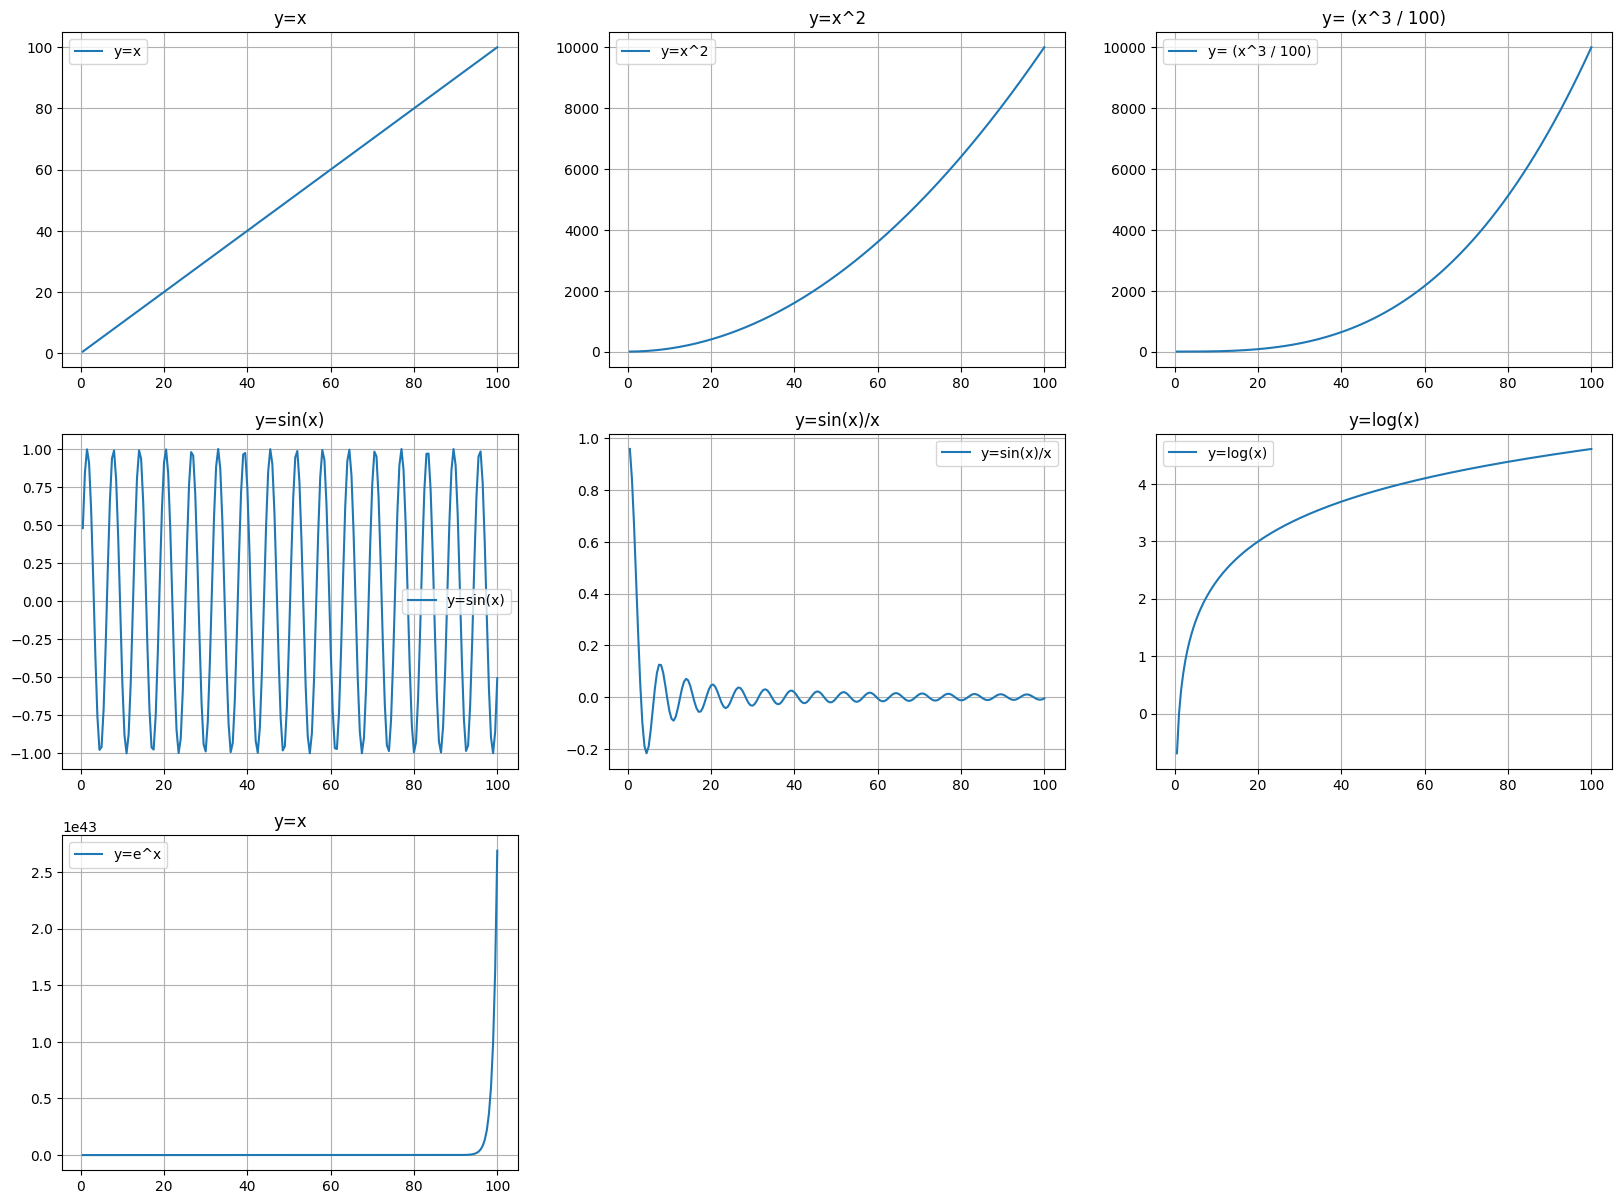

In [12]:
import matplotlib.pyplot as plt
x_values = np.arange(0.5, 100.5, 0.5)

y1= x_values
y2= x_values**2
y3= (x_values**3)/100
y4=np.sin(x_values)
y5=np.sin(x_values)/x_values
y6=np.log(x_values)
y7=np.exp(x_values)

plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
plt.plot(x_values, y1, label='y=x')
plt.title('y=x')
plt.grid(True)
plt.legend()

plt.subplot(4,3,2)
plt.plot(x_values, y2, label='y=x^2')
plt.title('y=x^2')
plt.grid(True)
plt.legend()

plt.subplot(4,3,3)
plt.plot(x_values, y3, label='y= (x^3 / 100)')
plt.title('y= (x^3 / 100)')
plt.grid(True)
plt.legend()

plt.subplot(4,3,4)
plt.plot(x_values, y4, label='y=sin(x)')
plt.title('y=sin(x)')
plt.grid(True)
plt.legend()

plt.subplot(4,3,5)
plt.plot(x_values, y5, label='y=sin(x)/x')
plt.title('y=sin(x)/x')
plt.grid(True)
plt.legend()

plt.subplot(4,3,6)
plt.plot(x_values, y6, label='y=log(x)')
plt.title('y=log(x)')
plt.grid(True)
plt.legend()

plt.subplot(4,3,7)
plt.plot(x_values, y7, label='y=e^x')
plt.title('y=x')
plt.grid(True)
plt.legend()

plt.show()

***Q10)*** Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [13]:
import pandas as pd

matrix= np.random.uniform(1,2,size=(20,5))

df=pd.DataFrame(matrix)
df.columns=['a','b','c','d','e']

column_with_highest_std = df.std().idxmax()
row_with_lowest_mean = df.mean(axis=1).idxmin()         # axis=1 represents row and does row wise operation

print(df)
print("\nColumn with the highest standard deviation:", column_with_highest_std)
print("Row with the lowest mean:", row_with_lowest_mean)

           a         b         c         d         e
0   1.151230  1.015994  1.372594  1.412604  1.914709
1   1.294307  1.422782  1.616435  1.582133  1.718976
2   1.227220  1.998748  1.222140  1.918009  1.955799
3   1.570318  1.720189  1.593780  1.085196  1.686767
4   1.923718  1.450005  1.890563  1.606264  1.753951
5   1.297966  1.402400  1.632582  1.232055  1.033933
6   1.550007  1.927460  1.115064  1.013908  1.788272
7   1.405586  1.685330  1.480277  1.776332  1.862082
8   1.230337  1.024371  1.199523  1.864051  1.901625
9   1.837945  1.686507  1.677350  1.726269  1.718218
10  1.301288  1.574484  1.864678  1.090781  1.145997
11  1.273515  1.507981  1.199394  1.962340  1.685532
12  1.373695  1.512009  1.181953  1.562992  1.620006
13  1.755860  1.011505  1.387940  1.685757  1.427660
14  1.725979  1.892245  1.898213  1.695814  1.291235
15  1.819443  1.509570  1.809113  1.798269  1.683231
16  1.439063  1.299239  1.206796  1.068745  1.588390
17  1.302308  1.115019  1.323604  1.985044  1.

***Q11)*** Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [14]:
df['f']=df[['a','b','c','d','e']].sum(axis=1)

df['g']= np.where(df['f']<8, 'LT8', 'GT8')

std_for_lt8 = df[df['g']=='LT8']['f'].std()
std_for_gt8 = df[df['g']=='GT8']['f'].std()

print(df)
print("\nStandard deviation of 'f' for 'LT8':", std_for_lt8)
print("Standard deviation of 'f' for 'GT8':", std_for_gt8)

           a         b         c         d         e         f    g
0   1.151230  1.015994  1.372594  1.412604  1.914709  6.867132  LT8
1   1.294307  1.422782  1.616435  1.582133  1.718976  7.634633  LT8
2   1.227220  1.998748  1.222140  1.918009  1.955799  8.321916  GT8
3   1.570318  1.720189  1.593780  1.085196  1.686767  7.656251  LT8
4   1.923718  1.450005  1.890563  1.606264  1.753951  8.624501  GT8
5   1.297966  1.402400  1.632582  1.232055  1.033933  6.598935  LT8
6   1.550007  1.927460  1.115064  1.013908  1.788272  7.394711  LT8
7   1.405586  1.685330  1.480277  1.776332  1.862082  8.209607  GT8
8   1.230337  1.024371  1.199523  1.864051  1.901625  7.219908  LT8
9   1.837945  1.686507  1.677350  1.726269  1.718218  8.646289  GT8
10  1.301288  1.574484  1.864678  1.090781  1.145997  6.977228  LT8
11  1.273515  1.507981  1.199394  1.962340  1.685532  7.628763  LT8
12  1.373695  1.512009  1.181953  1.562992  1.620006  7.250654  LT8
13  1.755860  1.011505  1.387940  1.685757  1.42

***Q12)*** Write a small piece of code to explain broadcasting in numpy.

Broadcasting in numpy is allows operations on arrays of different shapes and sizes without theneed for explicit looping. It makes it possible to perform element-wise operations on arrays of different shapes.

In [15]:
scalar_value = 5
array_1d = np.array([1, 2, 3, 4, 5])
result_1d = array_1d + scalar_value
print("Resultent 1D array")
print(result_1d)

array_1d_broadcast = np.array([10, 20, 30, 40, 50])
array_2d = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
result_2d = array_2d + array_1d_broadcast
print("\nResultant 2D array")
print(result_2d)

Resultent 1D array
[ 6  7  8  9 10]

Resultant 2D array
[[11 22 33 44 55]
 [16 27 38 49 60]]


***Q13)*** Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [16]:
def own_argmin(arr):
    min_idx=0
    min=arr[0]
    for i in range(1,len(arr)):
        if arr[i]< min:
            min= arr[i]
            min_idx=i
    return min_idx

arr=np.array([5,3,8,2,7,1])
result_own_argmin= own_argmin(arr)
result_np_argmin= np.argmin(arr)

print("Original Array:", arr)
print("Index of the minimum element (Our own argmin function):", result_own_argmin)
print("Index of the minimum element (np.argmin):", result_np_argmin)


Original Array: [5 3 8 2 7 1]
Index of the minimum element (Our own argmin function): 5
Index of the minimum element (np.argmin): 5
